# Tutorial

Computer simulations of the Earth’s climate and weather generate huge amounts of data. These data are often persisted on HPC systems or in the cloud across multiple data assets in a variety of formats (netCDF, zarr, etc…). Finding, investigating, and loading these data assets costs time and effort. The end user needs to not only know what data sets are available, but also the attributes describing each data set, before loading a specific data set and analyzing it.  The intake-esm package aims to provide a simple, high-level interface to searching and loading Earth System Model (ESM) data archives, such as CMIP6. 

## Loading a catalog

Intake-esm works as follows:


1. Load an ESM data catalog file. The JSON-based catalog file must conform to the [ESM Collection Specification](https://github.com/NCAR/esm-collection-spec).
2. Create an [intake catalog object](https://intake.readthedocs.io/en/latest/catalog.html).
3. Use aggregation information from the ESM data catalog to construct keys for available high-level aggregated xarray datasets, called catalog entries.

To begin, import intake:

In [1]:
import intake

In [2]:
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)
col

,unique
activity_id,15
institution_id,33
source_id,70
experiment_id,102
member_id,140
table_id,29
variable_id,369
grid_label,10
zstore,267459
dcpp_init_year,60


In [3]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,AS-RCEC,TaiESM1,histSST,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/AerChemMIP/AS-RCEC/TaiESM1/histSST/...,NaN
1,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrbc,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN
2,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrdust,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN
3,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmroa,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN
4,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrso4,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN


## Catalog Entries

In [4]:
len(col.keys())

3870

Intake-esm uses the `key_template` property in order to create catalog entry keys

In [5]:
print(col.key_template)

activity_id.institution_id.source_id.experiment_id.table_id.grid_label


Let's take a look at the first ten entries

In [6]:
col.keys()[:10]

['AerChemMIP.AS-RCEC.TaiESM1.histSST.AERmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.histSST.AERmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.histSST.Amon.gn',
 'AerChemMIP.BCC.BCC-ESM1.piClim-CH4.Amon.gn',
 'AerChemMIP.BCC.BCC-ESM1.piClim-NTCF.Amon.gn',
 'AerChemMIP.BCC.BCC-ESM1.piClim-control.AERmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.piClim-control.Amon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.AERmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.Amon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.LImon.gn']

Each key in this list points to the assets (files) that will be merged into a single xarray dataset.

In [7]:
entry = col["AerChemMIP.BCC.BCC-ESM1.piClim-control.AERmon.gn"]
print(entry)

name: AerChemMIP.BCC.BCC-ESM1.piClim-control.AERmon.gn
container: xarray
plugin: ['esm_group']
description: 
direct_access: True
user_parameters: []
metadata: 
args: 
  df:    activity_id institution_id source_id   experiment_id member_id table_id  \
73  AerChemMIP            BCC  BCC-ESM1  piClim-control  r1i1p1f1   AERmon   
74  AerChemMIP            BCC  BCC-ESM1  piClim-control  r1i1p1f1   AERmon   
75  AerChemMIP            BCC  BCC-ESM1  piClim-control  r1i1p1f1   AERmon   
76  AerChemMIP            BCC  BCC-ESM1  piClim-control  r1i1p1f1   AERmon   
77  AerChemMIP            BCC  BCC-ESM1  piClim-control  r1i1p1f1   AERmon   

   variable_id grid_label                                             zstore  \
73       mmrbc         gn  gs://cmip6/AerChemMIP/BCC/BCC-ESM1/piClim-cont...   
74     mmrdust         gn  gs://cmip6/AerChemMIP/BCC/BCC-ESM1/piClim-cont...   
75       mmroa         gn  gs://cmip6/AerChemMIP/BCC/BCC-ESM1/piClim-cont...   
76      mmrso4         gn  gs://cmip6/

## Search and discovery

If the catalog has too many entries to comfortably know the keys corresponding to datasets of interest, you can narrow it by searching via the `unique()` and `search()` methods. 


### Finding unique entries


Let's query the data to see what models (`source_id`), experiments (`experiment_id`) and temporal frequencies (`table_id`) are available.

In [8]:
import pprint

uni_dict = col.unique(["source_id", "experiment_id", "table_id"])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 102,
                   'values': ['1pctCO2', '1pctCO2-bgc', 'abrupt-0p5xCO2',
                              'abrupt-2xCO2', 'abrupt-4xCO2', 'abrupt-solm4p',
                              'abrupt-solp4p', 'amip', 'amip-4xCO2',
                              'amip-future4K', 'amip-hist', 'amip-lwoff',
                              'amip-m4K', 'amip-p4K', 'amip-p4K-lwoff',
                              'aqua-4xCO2', 'aqua-control',
                              'aqua-control-lwoff', 'aqua-p4K',
                              'aqua-p4K-lwoff', 'control-1950', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-amv-ExTrop-neg',
                              'dcppC-amv-ExTrop-pos', 'dcppC-amv-Trop-neg',
                              'dcppC-amv-Trop-pos', 'dcppC-amv-neg',
                              'dcppC-amv-pos', 'dcppC-atl-control',
                              'dcppC-atl-pacemaker', 'dcppC-hindcast-noAgung',
                              'd

### Searching for specific datasets

The ``search()`` method allows the user to perform a query on a catalog using keyword arguments. This method returns a subset of the catalog
with all the entries that match the provided query.

Let's find all the dissolved oxygen data at annual frequency from the ocean for the `historical` and `ssp585` experiments.

In [9]:
cat = col.search(
    experiment_id=["historical", "ssp585"],
    table_id="Oyr",
    variable_id="o2",
    grid_label="gn",
)

cat

,unique
activity_id,2
institution_id,9
source_id,10
experiment_id,2
member_id,45
table_id,1
variable_id,1
grid_label,1
zstore,138
dcpp_init_year,0


In [10]:
cat.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,CMIP,CCCma,CanESM5-CanOE,historical,r1i1p2f1,Oyr,o2,gn,gs://cmip6/CMIP/CCCma/CanESM5-CanOE/historical...,NaN
1,CMIP,CCCma,CanESM5-CanOE,historical,r2i1p2f1,Oyr,o2,gn,gs://cmip6/CMIP/CCCma/CanESM5-CanOE/historical...,NaN
2,CMIP,CCCma,CanESM5-CanOE,historical,r3i1p2f1,Oyr,o2,gn,gs://cmip6/CMIP/CCCma/CanESM5-CanOE/historical...,NaN
3,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Oyr,o2,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
4,CMIP,CCCma,CanESM5,historical,r10i1p2f1,Oyr,o2,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN


### Enhanced search: enforce query criteria via `require_all_on` argument 


By default intake-esm's `search()` method returns entries that fulfill any of the criteria specified in the query. Today intake-esm can return entries that fulfill all query criteria when the user supplies the `require_all_on` argument. The `require_all_on` parameter can be **a dataframe column** or **a list of dataframe columns** across which all elements must satisfy the query criteria. The `require_all_on` argument is best explained with the following example. 

Let's define a query for our collection that requests multiple `variable_ids` and multiple `experiment_ids` from the Omon `table_id`, all from 3 different `source_ids`:

In [11]:
# Define our query
query = dict(
    variable_id=["thetao", "o2"],
    experiment_id=["historical", "ssp245", "ssp585"],
    table_id=["Omon"],
    source_id=["ACCESS-ESM1-5", "AWI-CM-1-1-MR", "FGOALS-f3-L"],
)

Now, let's use this query to search for all assets in the collection that satisfy any combination of these requests (i.e., with `require_all_on=None`, which is the default):

In [12]:
col_subset = col.search(**query)

col_subset.df.groupby("source_id")[
    ["experiment_id", "variable_id", "table_id"]
].nunique()

,experiment_id,variable_id,table_id
source_id,,,
ACCESS-ESM1-5,3,2,1
AWI-CM-1-1-MR,3,1,1
FGOALS-f3-L,1,1,1


As you can see, the search results above include `source_ids` for which we only have one of the two variables, and one or two of the three experiments.

We can tell intake-esm to discard any `source_id` that doesn't have both variables `["thetao", "o2"]` and all three experiments `["historical", "ssp245", "ssp585"]` by passing `require_all_on=["source_id"]` to the search method:

Next, let's search for assets that fulfill our query with `require_all_on=["source_id"]`:

In [13]:
col_subset = col.search(require_all_on=["source_id"], **query)
col_subset.df.groupby("source_id")[
    ["experiment_id", "variable_id", "table_id"]
].nunique()

,experiment_id,variable_id,table_id
source_id,,,
ACCESS-ESM1-5,3,2,1


Notice that with the `require_all_on=["source_id"]` option, the only `source_id that` was returned by our query was the `source_id` for which all of the variables and experiments were found.

## Loading datasets

As pointed out earlier, intake-esm contains logic to merge the query results into higher level [xarray datasets](http://xarray.pydata.org/en/stable/api.html#dataset).

Once you have identified one/more dataset(s), you can load it/them into xarray dataset via:

- `to_dask()` method. This method is available on the **catalog entry object**. Calling this method on a catalog entry yields **a single**, high-level aggregated xarray dataset.
- `to_dataset_dict()` method. This method is available on the **catalog object**. Calling this method on a catalog object yields **a dictionary** of high-level aggregated xarray datasets. 

### Using `to_dask()`

From our previous `cat` catalog object, Let's 

- extract a key of interest from the catalog object. This will yield an catalog entry corresponding to a single, high-level aggregated xarray dataset.
- use `to_dask()` method to load the catalog entry into an xarray dataset.

In [14]:
print(len(cat))

18


In [15]:
cat.keys()[:10]

['CMIP.CCCma.CanESM5.historical.Oyr.gn',
 'CMIP.CCCma.CanESM5-CanOE.historical.Oyr.gn',
 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Oyr.gn',
 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.Oyr.gn',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.Oyr.gn',
 'CMIP.MIROC.MIROC-ES2L.historical.Oyr.gn',
 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.Oyr.gn',
 'CMIP.MPI-M.MPI-ESM1-2-LR.historical.Oyr.gn',
 'CMIP.NCC.NorESM2-LM.historical.Oyr.gn',
 'CMIP.NCC.NorESM2-MM.historical.Oyr.gn']

In [16]:
entry = cat['CMIP.CCCma.CanESM5.historical.Oyr.gn']
ds = entry(zarr_kwargs={'consolidated': True, 'decode_times': True}).to_dask()
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 291, lev: 45, member_id: 35, time: 165, vertices: 4)
Coordinates:
    time_bnds           (time, bnds) object dask.array<chunksize=(165, 2), meta=np.ndarray>
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(45, 2), meta=np.ndarray>
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-07-02 12:00:00 ... 2014-07-02 12:00:00
  * lev                 (lev) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * member_id           (member_id) <U9 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    o2                  (member_id, time, lev, j, i) float32 dask.array<chunksize=(1, 12, 45, 291, 360), meta=np.ndarray>
Attributes:
    title:                       CanESM5 output prepared for CMIP6
    cmor_version:                3.4.0
    references:                  Geophysical Model Development Special issue ...
    status:                      2019-10-25;created;by nhn2@columbia.edu
    sub_experiment:              none
    CCCma_model_hash:            Unknown
    parent_mip_era:              CMIP6
    source_id:                   CanESM5
    grid_label:                  gn
    YMDH_branch_time_in_child:   1850:01:01:00
    product:                     model-output
    mip_era:                     CMIP6
    Conventions:                 CF-1.7 CMIP-6.2
    experiment:                  all-forcing simulation of the recent past
    institution:                 Canadian Centre for Climate Modelling and An...
    institution_id:              CCCma
    frequency:                   yr
    parent_time_units:           days since 1850-01-01 0:0:0.0
    source_type:                 AOGCM
    data_specs_version:          01.00.29
    tracking_id:                 hdl:21.14100/41426118-701c-482b-ae16-82932e4...
    sub_experiment_id:           none
    parent_activity_id:          CMIP
    external_variables:          areacello volcello
    activity_id:                 CMIP
    version:                     v20190429
    nominal_resolution:          100 km
    parent_experiment_id:        piControl
    creation_date:               2019-05-30T08:58:45Z
    initialization_index:        1
    further_info_url:            https://furtherinfo.es-doc.org/CMIP6.CCCma.C...
    YMDH_branch_time_in_parent:  5950:01:01:00
    branch_method:               Spin-up documentation
    forcing_index:               1
    table_id:                    Oyr
    license:                     CMIP6 model data produced by The Government ...
    contact:                     ec.cccma.info-info.ccmac.ec@canada.ca
    variable_id:                 o2
    experiment_id:               historical
    CCCma_runid:                 p2-his09
    branch_time_in_parent:       1496500.0
    variant_label:               r9i1p2f1
    grid:                        ORCA1 tripolar grid, 1 deg with refinement t...
    realm:                       ocnBgchem
    history:                     2019-05-02T13:53:53Z ;rewrote data to be con...
    realization_index:           9
    CCCma_parent_runid:          p2-pictrl
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    branch_time_in_child:        0.0
    source:                      CanESM5 (2019): \naerosol: interactive\natmo...
    parent_source_id:            CanESM5
    intake_esm_varname:          o2
    intake_esm_dataset_key:      CMIP.CCCma.CanESM5.historical.

### Using `to_dataset_dict()`

Say you want to load datasets corresponding to all 18 keys instead of just extracting a single key from catalog object. You need to use the `to_dataset_dict()` method. This method will return a dictionary of aggregate xarray datasets as the name hints. 

In [17]:
dset_dict = cat.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "decode_times": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [18]:
pprint.pprint(dset_dict.keys())

dict_keys(['ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.Oyr.gn', 'ScenarioMIP.MIROC.MIROC-ES2L.ssp585.Oyr.gn', 'ScenarioMIP.DWD.MPI-ESM1-2-HR.ssp585.Oyr.gn', 'ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.Oyr.gn', 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.Oyr.gn', 'CMIP.NCC.NorESM2-MM.historical.Oyr.gn', 'CMIP.MIROC.MIROC-ES2L.historical.Oyr.gn', 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Oyr.gn', 'ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.Oyr.gn', 'CMIP.NCC.NorESM2-LM.historical.Oyr.gn', 'ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.Oyr.gn', 'ScenarioMIP.CCCma.CanESM5-CanOE.ssp585.Oyr.gn', 'CMIP.CCCma.CanESM5-CanOE.historical.Oyr.gn', 'CMIP.MPI-M.MPI-ESM1-2-LR.historical.Oyr.gn', 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.Oyr.gn', 'ScenarioMIP.CCCma.CanESM5.ssp585.Oyr.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Oyr.gn', 'CMIP.CCCma.CanESM5.historical.Oyr.gn'])


We can access a particular dataset as follows:

In [19]:
ds = dset_dict["CMIP.CCCma.CanESM5.historical.Oyr.gn"]
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 291, lev: 45, member_id: 35, time: 165, vertices: 4)
Coordinates:
    time_bnds           (time, bnds) object dask.array<chunksize=(165, 2), meta=np.ndarray>
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(45, 2), meta=np.ndarray>
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-07-02 12:00:00 ... 2014-07-02 12:00:00
  * lev                 (lev) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * member_id           (member_id) <U9 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    o2                  (member_id, time, lev, j, i) float32 dask.array<chunksize=(1, 12, 45, 291, 360), meta=np.ndarray>
Attributes:
    title:                       CanESM5 output prepared for CMIP6
    cmor_version:                3.4.0
    references:                  Geophysical Model Development Special issue ...
    status:                      2019-10-25;created;by nhn2@columbia.edu
    sub_experiment:              none
    CCCma_model_hash:            Unknown
    parent_mip_era:              CMIP6
    source_id:                   CanESM5
    grid_label:                  gn
    YMDH_branch_time_in_child:   1850:01:01:00
    product:                     model-output
    mip_era:                     CMIP6
    Conventions:                 CF-1.7 CMIP-6.2
    experiment:                  all-forcing simulation of the recent past
    institution:                 Canadian Centre for Climate Modelling and An...
    institution_id:              CCCma
    frequency:                   yr
    parent_time_units:           days since 1850-01-01 0:0:0.0
    source_type:                 AOGCM
    data_specs_version:          01.00.29
    tracking_id:                 hdl:21.14100/41426118-701c-482b-ae16-82932e4...
    sub_experiment_id:           none
    parent_activity_id:          CMIP
    external_variables:          areacello volcello
    activity_id:                 CMIP
    version:                     v20190429
    nominal_resolution:          100 km
    parent_experiment_id:        piControl
    creation_date:               2019-05-30T08:58:45Z
    initialization_index:        1
    further_info_url:            https://furtherinfo.es-doc.org/CMIP6.CCCma.C...
    YMDH_branch_time_in_parent:  5950:01:01:00
    branch_method:               Spin-up documentation
    forcing_index:               1
    table_id:                    Oyr
    license:                     CMIP6 model data produced by The Government ...
    contact:                     ec.cccma.info-info.ccmac.ec@canada.ca
    variable_id:                 o2
    experiment_id:               historical
    CCCma_runid:                 p2-his09
    branch_time_in_parent:       1496500.0
    variant_label:               r9i1p2f1
    grid:                        ORCA1 tripolar grid, 1 deg with refinement t...
    realm:                       ocnBgchem
    history:                     2019-05-02T13:53:53Z ;rewrote data to be con...
    realization_index:           9
    CCCma_parent_runid:          p2-pictrl
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    branch_time_in_child:        0.0
    source:                      CanESM5 (2019): \naerosol: interactive\natmo...
    parent_source_id:            CanESM5
    intake_esm_varname:          o2
    intake_esm_dataset_key:      CMIP.CCCma.CanESM5.historical.

Let’s create a quick plot for a slice of the data:

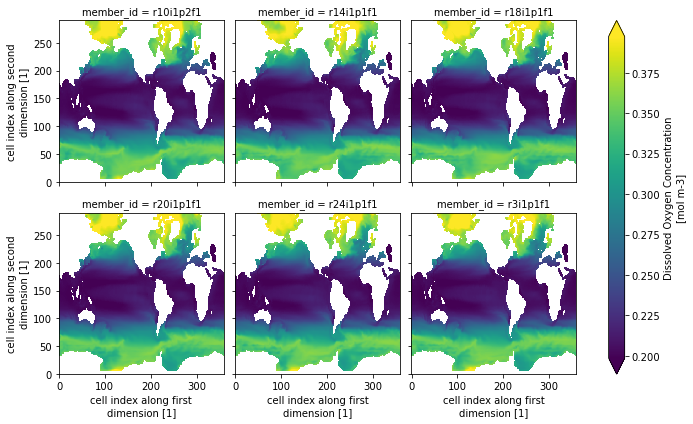

In [20]:
ds.o2.isel(time=0, lev=0, member_id=range(1, 24, 4)).plot(
    col="member_id", col_wrap=3, robust=True
)

## Using custom preprocessing functions

When comparing many models it is often necessary to preprocess (e.g. rename certain variables) them before running some analysis step. The `preprocess` argument lets the user pass a function, which is executed for each loaded asset before aggregations.

In [21]:
cat_pp = col.search(
    experiment_id=["historical"],
    table_id="Oyr",
    variable_id="o2",
    grid_label="gn",
    source_id=["IPSL-CM6A-LR", "CanESM5"],
    member_id="r10i1p1f1",
)
cat_pp.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Oyr,o2,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Oyr,o2,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN


In [22]:
# load the example
dset_dict_raw = cat_pp.to_dataset_dict(zarr_kwargs={"consolidated": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [23]:
for k, ds in dset_dict_raw.items():
    print(f"dataset key={k}\n\tdimensions={sorted(list(ds.dims))}\n")

dataset key=CMIP.IPSL.IPSL-CM6A-LR.historical.Oyr.gn
	dimensions=['axis_nbounds', 'member_id', 'nvertex', 'olevel', 'time', 'x', 'y']

dataset key=CMIP.CCCma.CanESM5.historical.Oyr.gn
	dimensions=['bnds', 'i', 'j', 'lev', 'member_id', 'time', 'vertices']




<div class="alert alert-info">

**Note:** 
    
Note that both models follow a different naming scheme. We can define a little helper function and pass it to ` .to_dataset_dict()` to fix this. For demonstration purposes we will focus on the vertical level dimension which is called `lev` in `CanESM5` and `olevel` in `IPSL-CM6A-LR`.
    
</div>



In [24]:
def helper_func(ds):
    """Rename `olevel` dim to `lev`"""
    ds = ds.copy()
    # a short example
    if "olevel" in ds.dims:
        ds = ds.rename({"olevel": "lev"})
    return ds

In [25]:
dset_dict_fixed = cat_pp.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, preprocess=helper_func
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [26]:
for k, ds in dset_dict_fixed.items():
    print(f"dataset key={k}\n\tdimensions={sorted(list(ds.dims))}\n")

dataset key=CMIP.IPSL.IPSL-CM6A-LR.historical.Oyr.gn
	dimensions=['axis_nbounds', 'lev', 'member_id', 'nvertex', 'time', 'x', 'y']

dataset key=CMIP.CCCma.CanESM5.historical.Oyr.gn
	dimensions=['bnds', 'i', 'j', 'lev', 'member_id', 'time', 'vertices']



This was just an example for one dimension. 


<div class="alert alert-info">

**Note:** 
    
Check out [cmip6-preprocessing package](https://github.com/jbusecke/cmip6_preprocessing) for a full renaming function for all available CMIP6 models and some other utilities.
    
    
</div>
